# TEAM - Sherlock

* Luis
* Victor
* Carlos
* Lander
* Juanma

## Práctica Grupal: SQL Murder
Para este ejercicio os vais a ponerte la gabardina y el sombrero ya que tendréis que investigar un asesinato en *SQL City*. 

Aplicaréis los conecptos básicos de SQL y tendréis que manejaros con un modelo de datos, mientras resuelves un caso de asesinato :)

Este espectacular juego está creado por **Joon Park y Cathy He**, y podrás encontrar todos los detalles en [su web](http://mystery.knightlab.com)

Por un lado tendréis que resolver el caso a través de la propia web, donde encontrarás un intérprete de sentencias SQL interactivo. Tendréis que apuntar las queries y su resultado y cuando tengáis el caso resuelto, tendréis que armar un notebook en el que atacando a la base de datos que tenéis en el directorio data, resolváis el crimen con las mismas queries de la página web. 

Subiréis el notebook al repositorio del grupo y haréis una pequeña presentación del resultado y vuestras pesquisas de no más de 10 minutos. Al finalizar el sprint 7.


### Enunciado
A crime has taken place and the detective needs your help. The detective gave you the crime scene report, but you somehow lost it. You vaguely remember that the crime was a **murder** that occurred sometime on **Jan.15, 2018** and that it took place in **SQL City**. Start by retrieving the corresponding crime scene report from the police department’s database.


### Modelo de datos
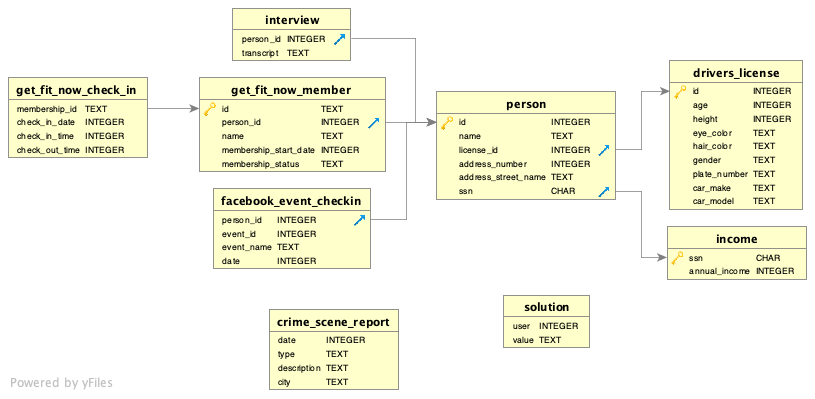

In [1]:
import pandas as pd
import sqlite3

In [2]:
connection = sqlite3.connect("./Data/sql-murder-mystery.db")
cursor = connection.cursor()

In [3]:
query = '''
    SELECT *
    FROM crime_scene_report
    '''

# Con fetch_all es una vista poco agradable
#
# cursor.execute(query)  
# cursor.fetchall()

# Aprovechemos las ventajas de pandas para ver una tabla de la BD
pd.read_sql(query, con = connection)

,date,type,description,city
0,20180115,robbery,A Man Dressed as Spider-Man Is on a Robbery Spree,NYC
1,20180115,murder,Life? Dont talk to me about life.,Albany
2,20180115,murder,"Mama, I killed a man, put a gun against his he...",Reno
3,20180215,murder,REDACTED REDACTED REDACTED,SQL City
4,20180215,murder,Someone killed the guard! He took an arrow to ...,SQL City
...,...,...,...,...
1223,20180430,bribery,\n,Garden Grove
1224,20180430,fraud,‘Why not?’ said the March Hare.\n,Houma
1225,20180430,assault,\n,Fontana
1226,20180501,assault,be NO mistake about it: it was neither more no...,Trenton


Acorde a las pistas sabemos que:

* crime_scene_report.date = 2018-10-15
* crime_scene_report.type = '%murder%'
* crime_scene_report.description = 'SQL City'

In [4]:
query = '''
    SELECT *
    FROM crime_scene_report
    WHERE type = "murder" and date = 20180115 and city = "SQL City"
'''

pd.read_sql(query, con = connection)    # No se ve el texto completo

,date,type,description,city
0,20180115,murder,Security footage shows that there were 2 witne...,SQL City


In [5]:
# Opción 1 para ver el texto completo --> Convertirlo en lista el parámetro que queremos
list(pd.read_sql(query, con = connection).description)

['Security footage shows that there were 2 witnesses. The first witness lives at the last house on "Northwestern Dr". The second witness, named Annabel, lives somewhere on "Franklin Ave".']

In [6]:
# Opción 2 para ver el texto completo --> Establecer la longitud máxima para la visualización de las columnas
pd.set_option('display.max_colwidth', None)     # None mostrará toda la longitud de la columna
pd.read_sql(query, con = connection)

,date,type,description,city
0,20180115,murder,"Security footage shows that there were 2 witnesses. The first witness lives at the last house on ""Northwestern Dr"". The second witness, named Annabel, lives somewhere on ""Franklin Ave"".",SQL City


In [7]:
query = '''    
    SELECT *
    FROM person
    WHERE address_street_name = "Northwestern Dr" 
    ORDER BY address_number desc
    '''
pd.read_sql(query, con = connection).head(1)

,id,name,license_id,address_number,address_street_name,ssn
0,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949


In [8]:
query = '''    
    SELECT *
    FROM person
    WHERE address_street_name = "Franklin Ave" and name like "Annabel%"
    '''
pd.read_sql(query, con = connection)

,id,name,license_id,address_number,address_street_name,ssn
0,16371,Annabel Miller,490173,103,Franklin Ave,318771143


In [9]:
query = '''
SELECT g.id, g.person.id, g.name
FROM get_fit_now_member as g
WHERE 

SyntaxError: incomplete input (3026197800.py, line 1)